In [1]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from matplotlib import pyplot as plt
import seaborn as sns
from IPython import display
import numpy as np
from PIL import Image
import torchmetrics

# Pytorhc MNIST 分类

In [2]:
sns.set()
display.set_matplotlib_formats("svg")

In [3]:
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

In [4]:
MNIST_TRAINSET = datasets.MNIST("./dataset/MNIST", train=True, transform=trans, 
                       download=True)

In [5]:
MNIST_TRAINSET.data.shape

torch.Size([60000, 28, 28])

In [6]:
MNIST_TESTSET = datasets.MNIST("./dataset/MNIST", train=False, transform=trans, 
                       download=True)

In [7]:
MNIST_TESTSET.data.shape

torch.Size([10000, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

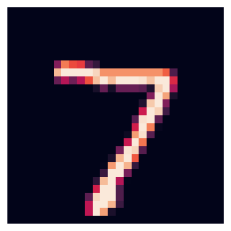

In [8]:
plt.imshow(MNIST_TESTSET.data[0])
plt.axis("off")

In [9]:
temp = make_grid(MNIST_TRAINSET.data[:16].unsqueeze(1), padding=5, 
                 pad_value=1)

(-0.5, 268.5, 70.5, -0.5)

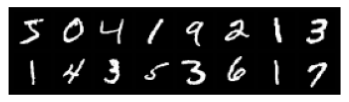

In [10]:
plt.imshow(temp.permute(1, 2, 0))
plt.axis("off")

# LeNet架构图

![LeNet](./image/lenet.svg)
![LeNet](./image/lenet-vert.svg)

$$
OutputSize: (H/W) = \frac{(H/W) + 2 * P - K}{S} + 1
$$

In [11]:
class LeNet(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        self.conv_part = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(2, 2)
        )
        self.MLP = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
            nn.Linear(120, 84), nn.Sigmoid(),
            nn.Linear(84, 10),
            nn.Softmax(dim=-1)
        )
    
    def forward(self, x):
        x = self.conv_part(x)
        x = x.reshape(x.shape[0], -1)
        return self.MLP(x)


In [12]:
data_loader = DataLoader(MNIST_TRAINSET, batch_size=128, shuffle=True, 
                         drop_last=True, num_workers=4)
criterion = nn.CrossEntropyLoss()
lenet = LeNet().to("cuda")
optimizer = optim.Adam(lenet.parameters(), lr=5e-4)

In [13]:
Epoch = 25
losses = []
accs = []
metric = torchmetrics.Accuracy()

In [14]:
for epoch in range(1, Epoch + 1):
    temp_acc = []
    temp_loss = []
    for i, (d, l) in enumerate(data_loader):
        d = d.to("cuda")
        l = l.to("cuda")
        out = lenet(d)
        lenet.zero_grad()
        loss = criterion(out, l)
        loss.backward()
        optimizer.step()
        acc = metric(out, l)
        temp_loss.append(loss.item())
        temp_acc.append(acc)
#         if (i + 1) % 10 == 0:
#             print("Epoch = {} step[{}/{}] Loss = {} Acc = {}".format(epoch, i + 1, 
#                                      len(data_loader), loss.item(), acc))
    losses.append(np.mean(temp_loss))
    accs.append(np.mean(temp_acc))

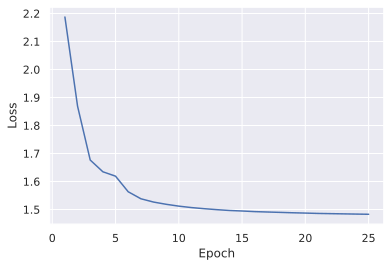

In [15]:
ax = sns.lineplot(x=np.arange(len(losses)) + 1, y=losses)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
plt.savefig(fname="MNIST Loss.svg", format="svg")

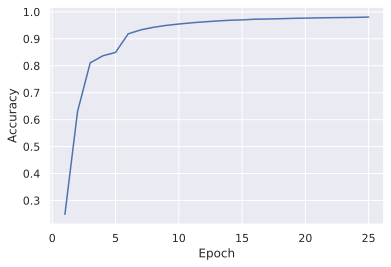

In [16]:
ax = sns.lineplot(x=np.arange(len(accs)) + 1, y=accs)
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
plt.savefig(fname="MNIST Accuracy.svg", format="svg")

In [17]:
lenet.train(False)
test_loader = DataLoader(MNIST_TESTSET, batch_size=128, shuffle=True, 
                         drop_last=True, num_workers=4)

test_accs = []

with torch.no_grad():
    for i, (d, l) in enumerate(data_loader):
        d = d.to("cuda")
        l = l.to("cuda")
        out = lenet(d)
        acc = metric(out, l)
        test_accs.append(acc)
    print("Average accuaracy : {}".format(np.mean(test_accs)))

Average accuaracy : 0.981370210647583


# Pytorch Fashion MNIST 分类

In [18]:
FashionMNIST_TRAINSET = datasets.FashionMNIST("./dataset/FashionMNIST", train=True, 
                                       transform=trans, download=True)
FashionMNIST_TESTSET = datasets.FashionMNIST("./dataset/FashionMNIST", train=False, 
                                      transform=trans, download=True)

(-0.5, 27.5, 27.5, -0.5)

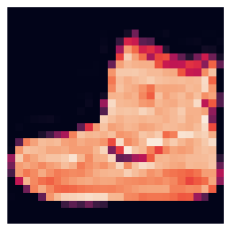

In [19]:
plt.imshow(FashionMNIST_TRAINSET.data[0])
plt.axis("off")

(-0.5, 268.5, 70.5, -0.5)

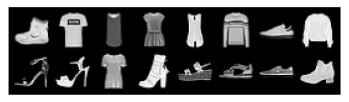

In [20]:
temp = make_grid(FashionMNIST_TRAINSET.data[:16].unsqueeze(1), padding=5, 
                 pad_value=1)
plt.imshow(temp.permute(1, 2, 0))
plt.axis("off")

In [21]:
FashionMNIST_TESTSET.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [22]:
data_loader = DataLoader(FashionMNIST_TRAINSET, batch_size=128, shuffle=True, 
                         drop_last=True, num_workers=4)
criterion = nn.CrossEntropyLoss()
lenet = LeNet().to("cuda")
optimizer = optim.Adam(lenet.parameters(), lr=5e-4)

In [23]:
Epoch = 25
losses = []
accs = []
metric = torchmetrics.Accuracy()

In [24]:
for epoch in range(1, Epoch + 1):
    temp_acc = []
    temp_loss = []
    for i, (d, l) in enumerate(data_loader):
        d = d.to("cuda")
        l = l.to("cuda")
        out = lenet(d)
        lenet.zero_grad()
        loss = criterion(out, l)
        loss.backward()
        optimizer.step()
        acc = metric(out, l)
        temp_loss.append(loss.item())
        temp_acc.append(acc)
#         if (i + 1) % 10 == 0:
#             print("Epoch = {} step[{}/{}] Loss = {} Acc = {}".format(epoch, i + 1, 
#                                      len(data_loader), loss.item(), acc))
    losses.append(np.mean(temp_loss))
    accs.append(np.mean(temp_acc))

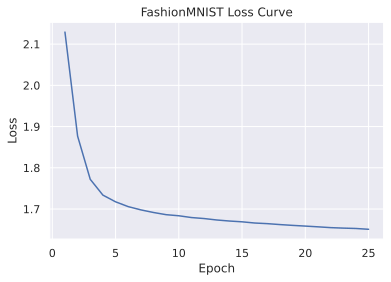

In [25]:
ax = sns.lineplot(x=np.arange(len(losses)) + 1, y=losses)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("FashionMNIST Loss Curve")
plt.savefig(fname="FashionMNIST Loss.svg", format="svg")

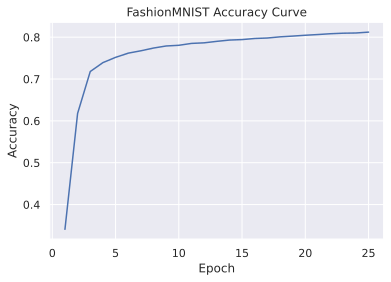

In [26]:
ax = sns.lineplot(x=np.arange(len(accs)) + 1, y=accs)
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.set_title("FashionMNIST Accuracy Curve")
plt.savefig(fname="FashionMNIST Accuracy.svg", format="svg")

In [27]:
lenet.train(False)
test_loader = DataLoader(FashionMNIST_TESTSET, batch_size=128, shuffle=True, 
                         drop_last=True, num_workers=4)

test_accs = []

with torch.no_grad():
    for i, (d, l) in enumerate(data_loader):
        d = d.to("cuda")
        l = l.to("cuda")
        out = lenet(d)
        acc = metric(out, l)
        test_accs.append(acc)
    print("Average accuaracy : {}".format(np.mean(test_accs)))

Average accuaracy : 0.8087105751037598


In [28]:
from torchsummary import summary

In [30]:
s = summary(lenet)

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       156
|    └─Sigmoid: 2-2                      --
|    └─AvgPool2d: 2-3                    --
|    └─Conv2d: 2-4                       2,416
|    └─Sigmoid: 2-5                      --
|    └─AvgPool2d: 2-6                    --
├─Sequential: 1-2                        --
|    └─Linear: 2-7                       48,120
|    └─Sigmoid: 2-8                      --
|    └─Linear: 2-9                       10,164
|    └─Sigmoid: 2-10                     --
|    └─Linear: 2-11                      850
|    └─Softmax: 2-12                     --
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
